### Information

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Flipping a coin (non biased) 100 times
rand_coins = np.random.binomial(1, 0.5, 100)

rand_coins

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

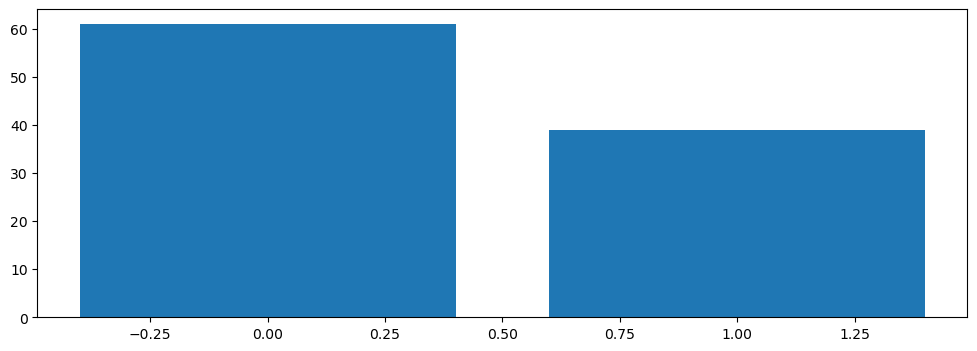

In [3]:
# Create an empty plot

fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);



In [4]:
x, counts

(array([0, 1]), array([61, 39]))

### Bernoulli Distribution

In [5]:
# The Bernoulli distribution is just the binomial with the first parameter as 1
# Remember binomial can be used for multiple coins as such by setting the first parameter

def bernoulli(p, size=None):
    return np.random.binomial(1, p, size)


In [6]:
bernoulli(0.5)

1

In [7]:
# Flipping an unfair coin

rand_coins = bernoulli(0.7, 100)

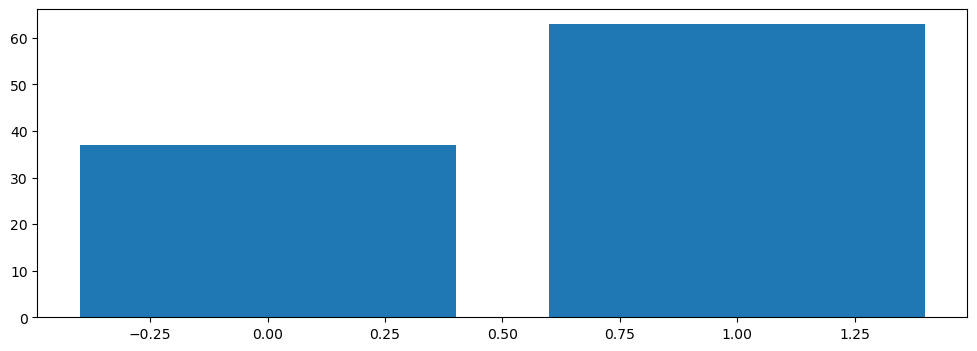

In [8]:
# Create a plot for the bernoulli

fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);

In [9]:
# Flipping two coins once each
rand_coins = np.random.binomial(2, .5)

rand_coins

# Will give the number of times heads (assuming heads is a successful trial) comes up

2

In [10]:
# Flipping two 100000 times to show the results - not .333 % chance of each outcome (2xheads, 1xheads, 0xheads)
rand_coins = np.random.binomial(2, .5, 20000)

rand_coins

array([2, 1, 1, ..., 1, 1, 2])

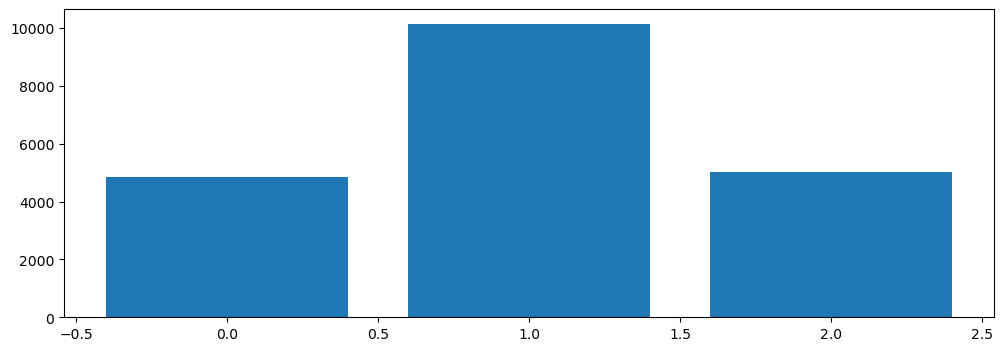

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);

In [12]:
x, counts

(array([0, 1, 2]), array([ 4850, 10138,  5012]))

**Explanation**

Possibilities = HH, HT, TH, TT (so HT = TH = 50% chance)



**Dice Rolls**



In [13]:
# Default random number generator
rng = np.random.default_rng()

In [14]:
# Roll a single Dice

rng.integers(1, 7)

6

In [15]:
# Roll a single Dice
single_rolls = rng.integers(1, 7, 100000)

In [16]:
# Count the unique values

x, counts = np.unique(single_rolls, return_counts=True)

x, counts

(array([1, 2, 3, 4, 5, 6]), array([16809, 16764, 16457, 16609, 16708, 16653]))

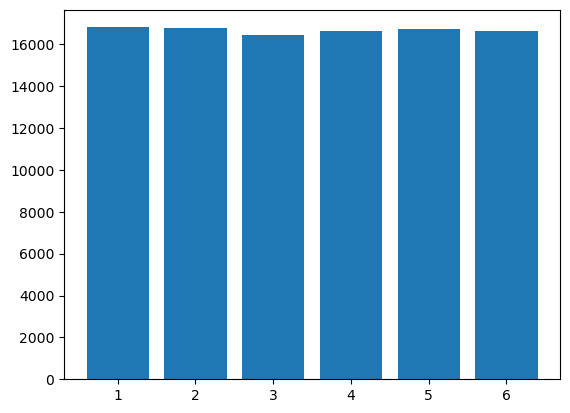

In [17]:
# Create a plot

fig, ax = plt.subplots()

ax.bar(x, counts);

In [18]:
# Roll two dice

double_rolls = rng.integers(1, 7, (100000, 2))

double_rolls

array([[6, 4],
       [6, 2],
       [2, 2],
       ...,
       [1, 4],
       [3, 1],
       [5, 1]])

In [19]:
# Sum the two dice

sum_double_rolls = double_rolls.sum(axis=1) #axis0 would sum the columns, axis1 sums by row

sum_double_rolls


array([10,  8,  4, ...,  5,  4,  6])

In [20]:
# Count the unique values

x, counts = np.unique(sum_double_rolls, return_counts=True)

x, counts

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 2766,  5497,  8354, 11080, 13898, 16632, 13918, 11229,  8375,
         5598,  2653]))

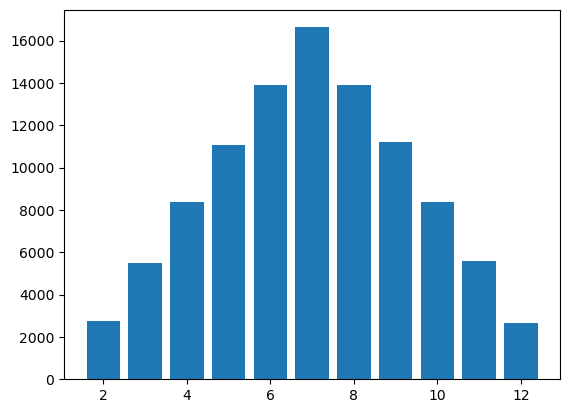

In [21]:
# Create a plot

fig, ax = plt.subplots()

ax.bar(x, counts);

In [22]:
# Plotting the individual rolls together to show how each roll is combined

individual_double_rolls = double_rolls[:,0] * 10 + double_rolls[:,1]

individual_double_rolls

array([64, 62, 22, ..., 14, 31, 51])

In [23]:
# Count the unique values

x, counts = np.unique(individual_double_rolls, return_counts=True)

x, counts

(array([11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35,
        36, 41, 42, 43, 44, 45, 46, 51, 52, 53, 54, 55, 56, 61, 62, 63, 64,
        65, 66]),
 array([2766, 2720, 2797, 2738, 2761, 2760, 2777, 2792, 2849, 2783, 2741,
        2829, 2765, 2716, 2819, 2744, 2734, 2804, 2777, 2804, 2781, 2846,
        2837, 2790, 2731, 2768, 2678, 2804, 2821, 2796, 2838, 2831, 2784,
        2764, 2802, 2653]))

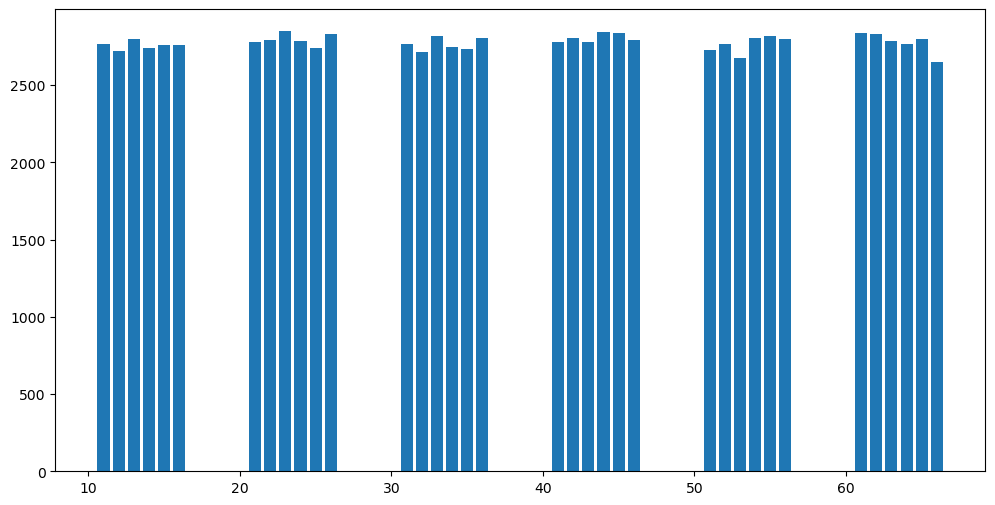

In [24]:
# Create a plot to show the breakdown of each roll

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x, counts);

The first group is the 1,1 1,2 1,3 1,4 1,5 1,6 
Second group is 2,1 2,2 2,3 2,4 2,5 2,6 
etc...

In [25]:
# Entropy

def H(p):
    return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)



In [26]:
# Entropy of 0.5

H(0.25)

0.8112781244591328

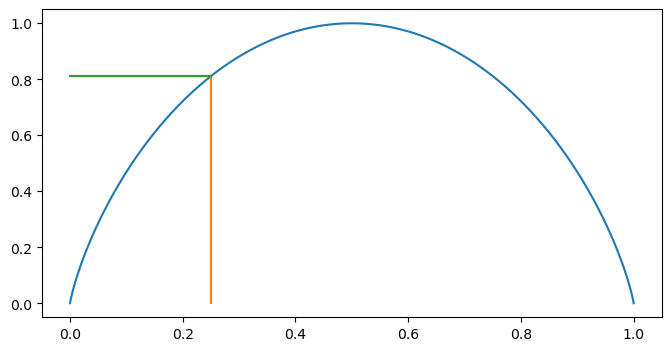

In [27]:
# Plotting Entropy

fig, ax = plt.subplots(figsize= (8,4))

# p is a probability

p = np.linspace(0.000001, 0.999999, 10001)



ax.plot(p, H(p))
plt.plot((0.25, 0.25), (0.0, 0.81))
plt.plot((0.0, 0.25), (0.81, 0.81))

In [28]:
rand_coins = np.random.binomial(2, .5, 100000)

rand_coins

array([2, 0, 0, ..., 2, 1, 2])

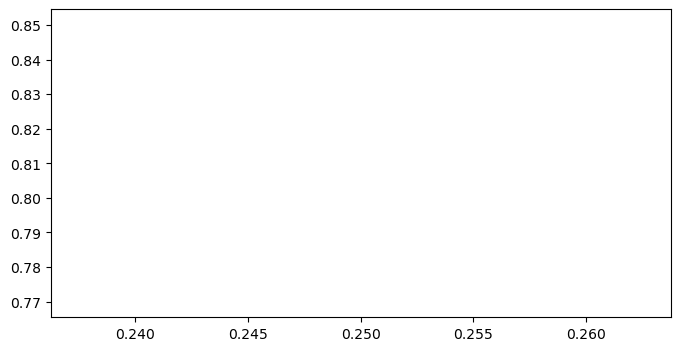

In [29]:
fig, ax = plt.subplots(figsize= (8,4))

# p is a probability

#p = np.linspace(0.000001, 0.999999, 10001)



ax.plot(.25, .81);

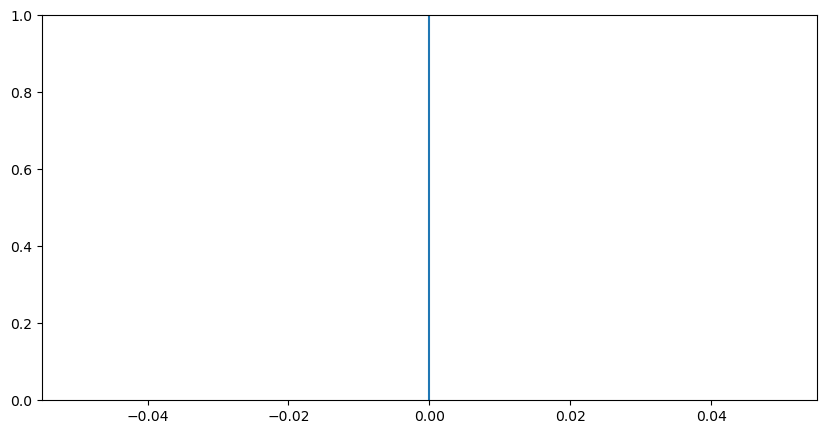

In [30]:
# defining plot size
plt.figure(figsize = (10, 5))
 
# specifying plot coordinates
plt.plot((0, 0), (0, 1), scaley = False)
 
# setting scaley = True will make the line fit
# within the frame, i.e It will appear as a finite line
plt.show()

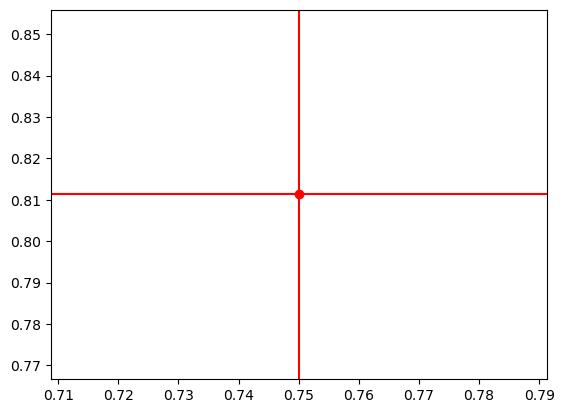

In [31]:
x_data = [0.75]
y_data = [0.8112781244591328]

plt.scatter(x_data, y_data, c='red')

for x, y in zip(x_data, y_data):
    plt.axvline(x=x, color='r', linestyle='-')
    plt.axhline(y=y, color='r', linestyle='-')